### Wizualizacja danych

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [4]:
my_blue="#0064B2"
my_red="#D61600"

In [5]:
dfs = pd.read_csv("../datasets/filtered_std_data_gasometry.csv")

In [22]:
dfs.describe()

,Unnamed: 0,PACJENT_NR,BADANIE_NR,ZGON,BETET,CO2TET,HCO3ACTE,HCO3STTE,O2SATTET,O2TET,PHTET,IONH
count,2934.000000,2934.000000,2934.000000,2934.000000,2931.000000,2931.000000,2931.000000,2931.000000,2930.000000,2933.000000,2932.000000,2932.000000
mean,1523.688139,71.593388,17.096455,0.479209,1.510777,1.621592,1.542483,1.706920,0.078423,1.072328,0.416716,0.677897
std,874.858237,39.454851,12.057591,0.499653,1.416936,1.344124,1.035656,1.315681,1.219197,1.518189,0.994732,1.140381
min,0.000000,1.000000,1.000000,0.000000,-4.586957,-2.743200,-1.933333,-3.125000,-10.600000,-2.436000,-4.810000,-1.090095
25%,767.250000,37.000000,7.000000,0.000000,0.630435,0.730000,0.800000,0.875000,-0.040000,0.052000,-0.040000,-0.032631
50%,1530.500000,76.000000,15.000000,0.000000,1.500000,1.500000,1.483333,1.700000,0.460000,0.768000,0.670000,0.328247
75%,2282.750000,105.000000,25.000000,1.000000,2.456522,2.320000,2.300000,2.575000,0.740000,1.864000,1.100000,1.008167
max,3044.000000,145.000000,64.000000,1.000000,6.760870,12.450000,9.300000,6.800000,1.000000,8.916000,2.680000,10.020726


In [21]:
max_badanie_nr = dfs.groupby('PACJENT_NR')['BADANIE_NR'].max().reset_index()
max_badanie_nr[max_badanie_nr["BADANIE_NR"]>6]["BADANIE_NR"].sum()

2934

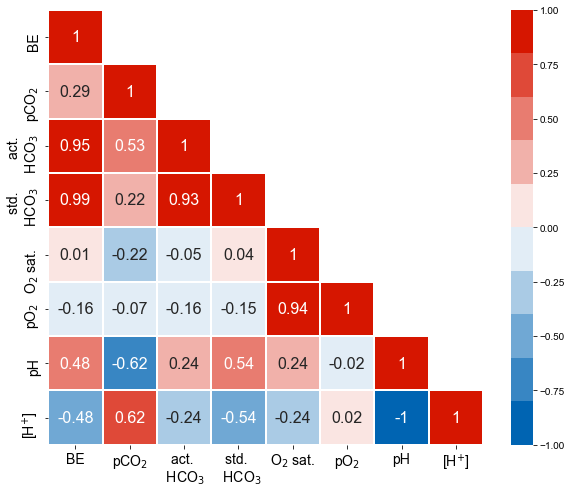

In [6]:
cmap = sns.blend_palette([my_blue, "white", my_red], n_colors=10)

df_corr=dfs[[
 'BETET',
 'CO2TET',
 'HCO3ACTE',
 'HCO3STTE',
 'O2SATTET',
 'O2TET','PHTET',
 'IONH']].corr(method='spearman')

df_corr_rounded = df_corr.round(2)
mask = np.triu(np.ones_like(df_corr, dtype=int))- np.eye(df_corr_rounded.shape[0], dtype=int).astype(bool)

fig, ax = plt.subplots(figsize=(10,8))
fig=sns.heatmap(df_corr_rounded, cmap=cmap, annot=True, mask=mask, linewidths=0.25, annot_kws=dict(size=16), square=True)
# sns.set_theme(font="Times New Roman")
ax.set_xticklabels(["BE","pCO$_2$", "act. \n HCO$_3$ ", "std. \n  HCO$_3$", "O$_2$ sat." ,"pO$_2$", "pH","[H$^\plus$]" ])
ax.set_yticklabels(["BE","pCO$_2$", "act. \n HCO$_3$ ", "std. \n  HCO$_3$", "O$_2$ sat." ,"pO$_2$", "pH","[H$^\plus$]" ])
sns.set_theme(style="whitegrid")
plt.xticks(size=14)
plt.yticks(size=14)
plt.xticks(rotation=0);
plt.savefig('..//images/korelacje_start.png', dpi=300)

In [9]:
fig = go.Figure()
cols=["BETET",	"CO2TET","HCO3ACTE","HCO3STTE",	"O2SATTET",	"O2TET", "IONH"]

for col in dfs[cols]:  # Iteracja po wszystkich kolumnach oprócz ZGON
    for zgon in dfs['ZGON'].unique():
        subset = dfs[dfs['ZGON'] == zgon]
        side = "negative" if zgon == 0 else "positive"
        color = my_blue if zgon == 0 else my_red

        fig.add_trace(go.Violin(y=subset[col], box_visible=True, name=f"{col}",
                                side=side, line_color=color, box={'visible': True}, opacity=0.8))

# Dodanie poziomej linii w y=0 i y=1
fig.update_layout(shapes=[go.layout.Shape(type='line', x0=0, x1=1, xref='paper', y0=0, y1=0, line=dict(color='black', dash='dot', width=1.5)),
                          go.layout.Shape(type='line', x0=0, x1=1, xref='paper', y0=1, y1=1, line=dict(color='black', dash='dot', width=1.5))])

# Dostosowanie rozmiaru czcionki osi x i y
fig.update_layout(xaxis=dict(tickfont=dict(size=14)), yaxis=dict(tickfont=dict(size=14)))
fig.update_layout(showlegend=False)
fig.update_layout(height=600, width=1000)
fig.update_layout(template="plotly_white")
fig.show()
fig.write_image("..//images/rozklad_parametrow.png", format="png", scale=3)